In [11]:
import pandas as pd
import psycopg2 as pg
import csv as c
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import mysql as sq
import os

In [51]:

list1 = pd.read_csv("data/spreadspoke_scores.csv")
Shape= list1.shape
print(Shape)
list2= list1.drop(['schedule_date',
          'stadium','stadium_neutral','weather_temperature',
          'weather_wind_mph','weather_humidity','weather_detail'],axis=1)
list3 = pd.DataFrame(list2)
list3.rename(columns ={'schedule_week': 'Game','schedule_season':'Year', 'over_under_line': 'OverUnder'
                       ,'spread_favorite': 'Spread', 'schedule_playoff': 'PostSeason'
                       , 'team_home': 'Home_Team', 'score_home':'Home_Score'
                       ,'score_away':'Away_Score','team_away': 'Away_Team'
                       ,'team_favorite_id':'Odds_Favorite'}, inplace = True)
list4 = list3.dropna()
list5 = list4[list4['Year']>1990]
list6 = list5[list5['Game']== 'Superbowl']            
list6.groupby(list6.columns, axis=1).agg(lambda x: x.apply(lambda y: ','.join([str(l) for l in y if str(l) != "nan"]), axis=1))

  



(13788, 17)


,Away_Score,Away_Team,Game,Home_Score,Home_Team,Odds_Favorite,OverUnder,PostSeason,Spread,Year
5385,24.0,Buffalo Bills,Superbowl,37.0,Washington Redskins,WAS,49,True,-7.0,1991
5620,17.0,Buffalo Bills,Superbowl,52.0,Dallas Cowboys,DAL,44.5,True,-6.5,1992
5855,13.0,Buffalo Bills,Superbowl,30.0,Dallas Cowboys,DAL,50.5,True,-10.5,1993
6090,26.0,San Diego Chargers,Superbowl,49.0,San Francisco 49ers,SF,53.5,True,-18.5,1994
6341,17.0,Pittsburgh Steelers,Superbowl,27.0,Dallas Cowboys,DAL,51,True,-13.5,1995
6592,21.0,New England Patriots,Superbowl,35.0,Green Bay Packers,GB,49,True,-14.0,1996
6843,31.0,Denver Broncos,Superbowl,24.0,Green Bay Packers,GB,49,True,-11.0,1997
7094,19.0,Atlanta Falcons,Superbowl,34.0,Denver Broncos,DEN,52.5,True,-7.5,1998
7353,16.0,Tennessee Titans,Superbowl,23.0,St. Louis Rams,LAR,45,True,-7.0,1999
7612,7.0,New York Giants,Superbowl,34.0,Baltimore Ravens,BAL,33,True,-3.0,2000


In [89]:
matches = list6.groupby(['Spread'])#Home_Team','Away_Team''])
for name, years in matches:
    print(f'All Superbowls in spread "{name}" category:')
    print(years, '\n\n\n\n')

All Superbowls in spread "(-18.5,)" category:
      Year       Game  PostSeason            Home_Team  Home_Score  \
6090  1994  Superbowl        True  San Francisco 49ers        49.0   

      Away_Score           Away_Team Odds_Favorite  Spread OverUnder  
6090        26.0  San Diego Chargers            SF   -18.5      53.5   




All Superbowls in spread "(-14.0,)" category:
      Year       Game  PostSeason          Home_Team  Home_Score  Away_Score  \
6592  1996  Superbowl        True  Green Bay Packers        35.0        21.0   
7871  2001  Superbowl        True     St. Louis Rams        17.0        20.0   

                 Away_Team Odds_Favorite  Spread OverUnder  
6592  New England Patriots            GB   -14.0        49  
7871  New England Patriots           LAR   -14.0        53   




All Superbowls in spread "(-13.5,)" category:
      Year       Game  PostSeason       Home_Team  Home_Score  Away_Score  \
6341  1995  Superbowl        True  Dallas Cowboys        27.0       

       Year       Game  PostSeason             Home_Team  Home_Score  \
10541  2011  Superbowl        True  New England Patriots        17.0   

       Away_Score        Away_Team Odds_Favorite  Spread OverUnder  
10541        21.0  New York Giants            NE    -2.5        53   




All Superbowls in spread "(-2.0,)" category:
       Year       Game  PostSeason         Home_Team  Home_Score  Away_Score  \
11075  2013  Superbowl        True    Denver Broncos         8.0        43.0   
12410  2018  Superbowl        True  Los Angeles Rams         3.0        13.0   

                  Away_Team Odds_Favorite  Spread OverUnder  
11075      Seattle Seahawks           DEN    -2.0      47.5  
12410  New England Patriots            NE    -2.0      55.5   




All Superbowls in spread "(-1.5,)" category:
       Year       Game  PostSeason           Home_Team  Home_Score  \
12677  2019  Superbowl        True  Kansas City Chiefs        31.0   

       Away_Score            Away_Team Odds_Favor

In [4]:
spread_df= list6.loc[:, ['Year', 'Spread']]
spread = (list6['Spread'] == list6['Spread'].max()) | (list6['Spread'] == list6['Spread'].min())
print(f'\n{spread_df[spread]}')

overunder_df= list6.loc[:, ['Year', 'OverUnder']]
overunder= (list6['OverUnder'] == list6['OverUnder'].max()) | (list6['OverUnder'] == list6['OverUnder'].min())
print(f'\n{overunder_df[overunder]}')

home_df= list6.loc[:, ['Year', 'Home_Score']]
home = (list6['Home_Score'] == list6['Home_Score'].max()) | (list6['Home_Score'] == list6['Home_Score'].min())
print(f'\n{home_df[home]}')

away_df= list6.loc[:, ['Year', 'Away_Score']]
away = (list6['Away_Score'] == list6['Away_Score'].max()) | (list6['Away_Score'] == list6['Away_Score'].min()) 
print(f'\n{away_df[away]}')



       Year  Spread
6090   1994   -18.5
11342  2014    -1.0
13515  2022    -1.0

       Year OverUnder
7612   2000        33
11876  2016      57.5

       Year  Home_Score
5620   1992        52.0
12410  2018         3.0

      Year  Away_Score
7612  2000         7.0
8138  2002        48.0


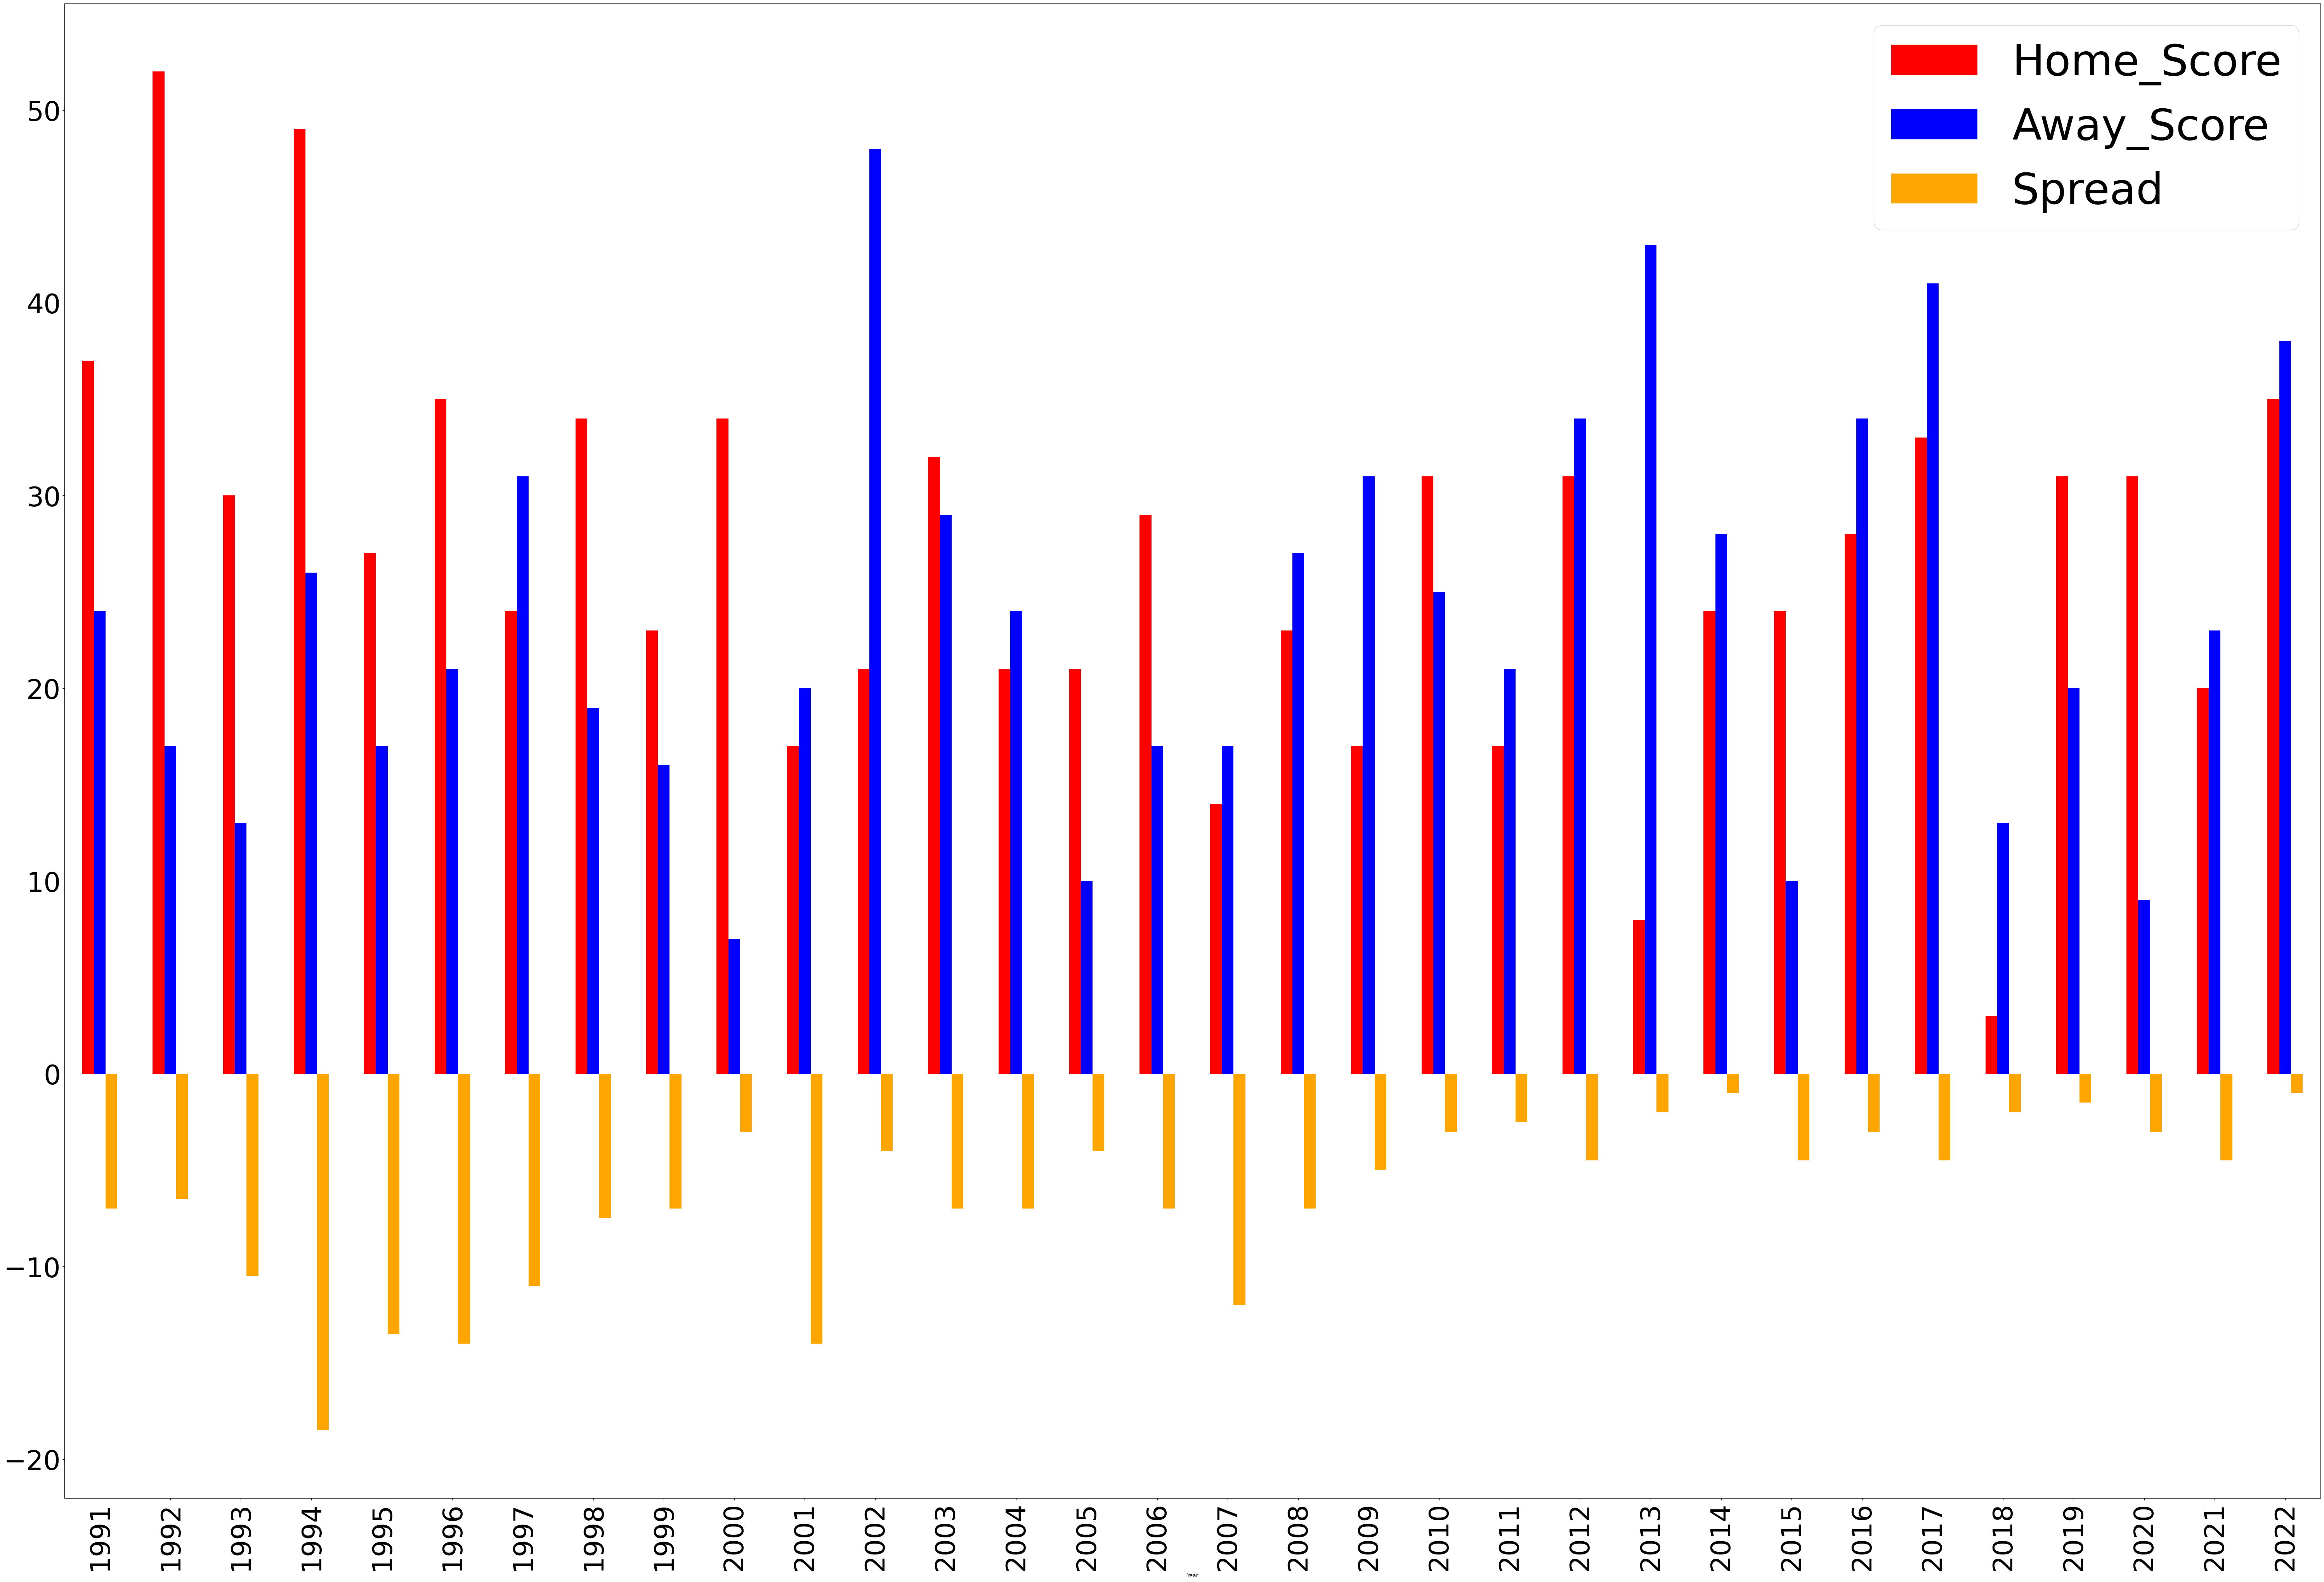

In [5]:

list6.plot(x="Year", kind="bar", color=['red', 'blue','orange'],rot=90, fontsize='50',figsize = (75,50)).legend(loc='best', fontsize=80)



In [6]:
x= list6['Home_Score']
y= list6['Away_Score']
s= list6['Spread']
o= list6['Odds_Favorite']
ht=list6['Home_Team']
at=list6['Away_Team']

<Axes: >

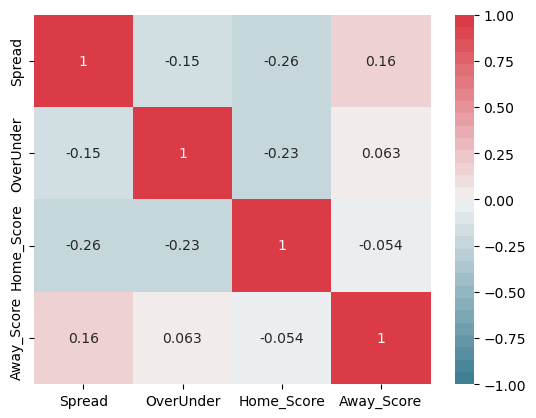

In [7]:
spreads_df =list6.loc[:,['Spread', 'OverUnder', 'Home_Score', 'Away_Score']]
sns.heatmap(spreads_df.corr(), annot=True, cmap=sns.diverging_palette(220,10,sep=1,n=30),vmin=-1,vmax=1)

<Axes: xlabel='Away_Score', ylabel='Count'>

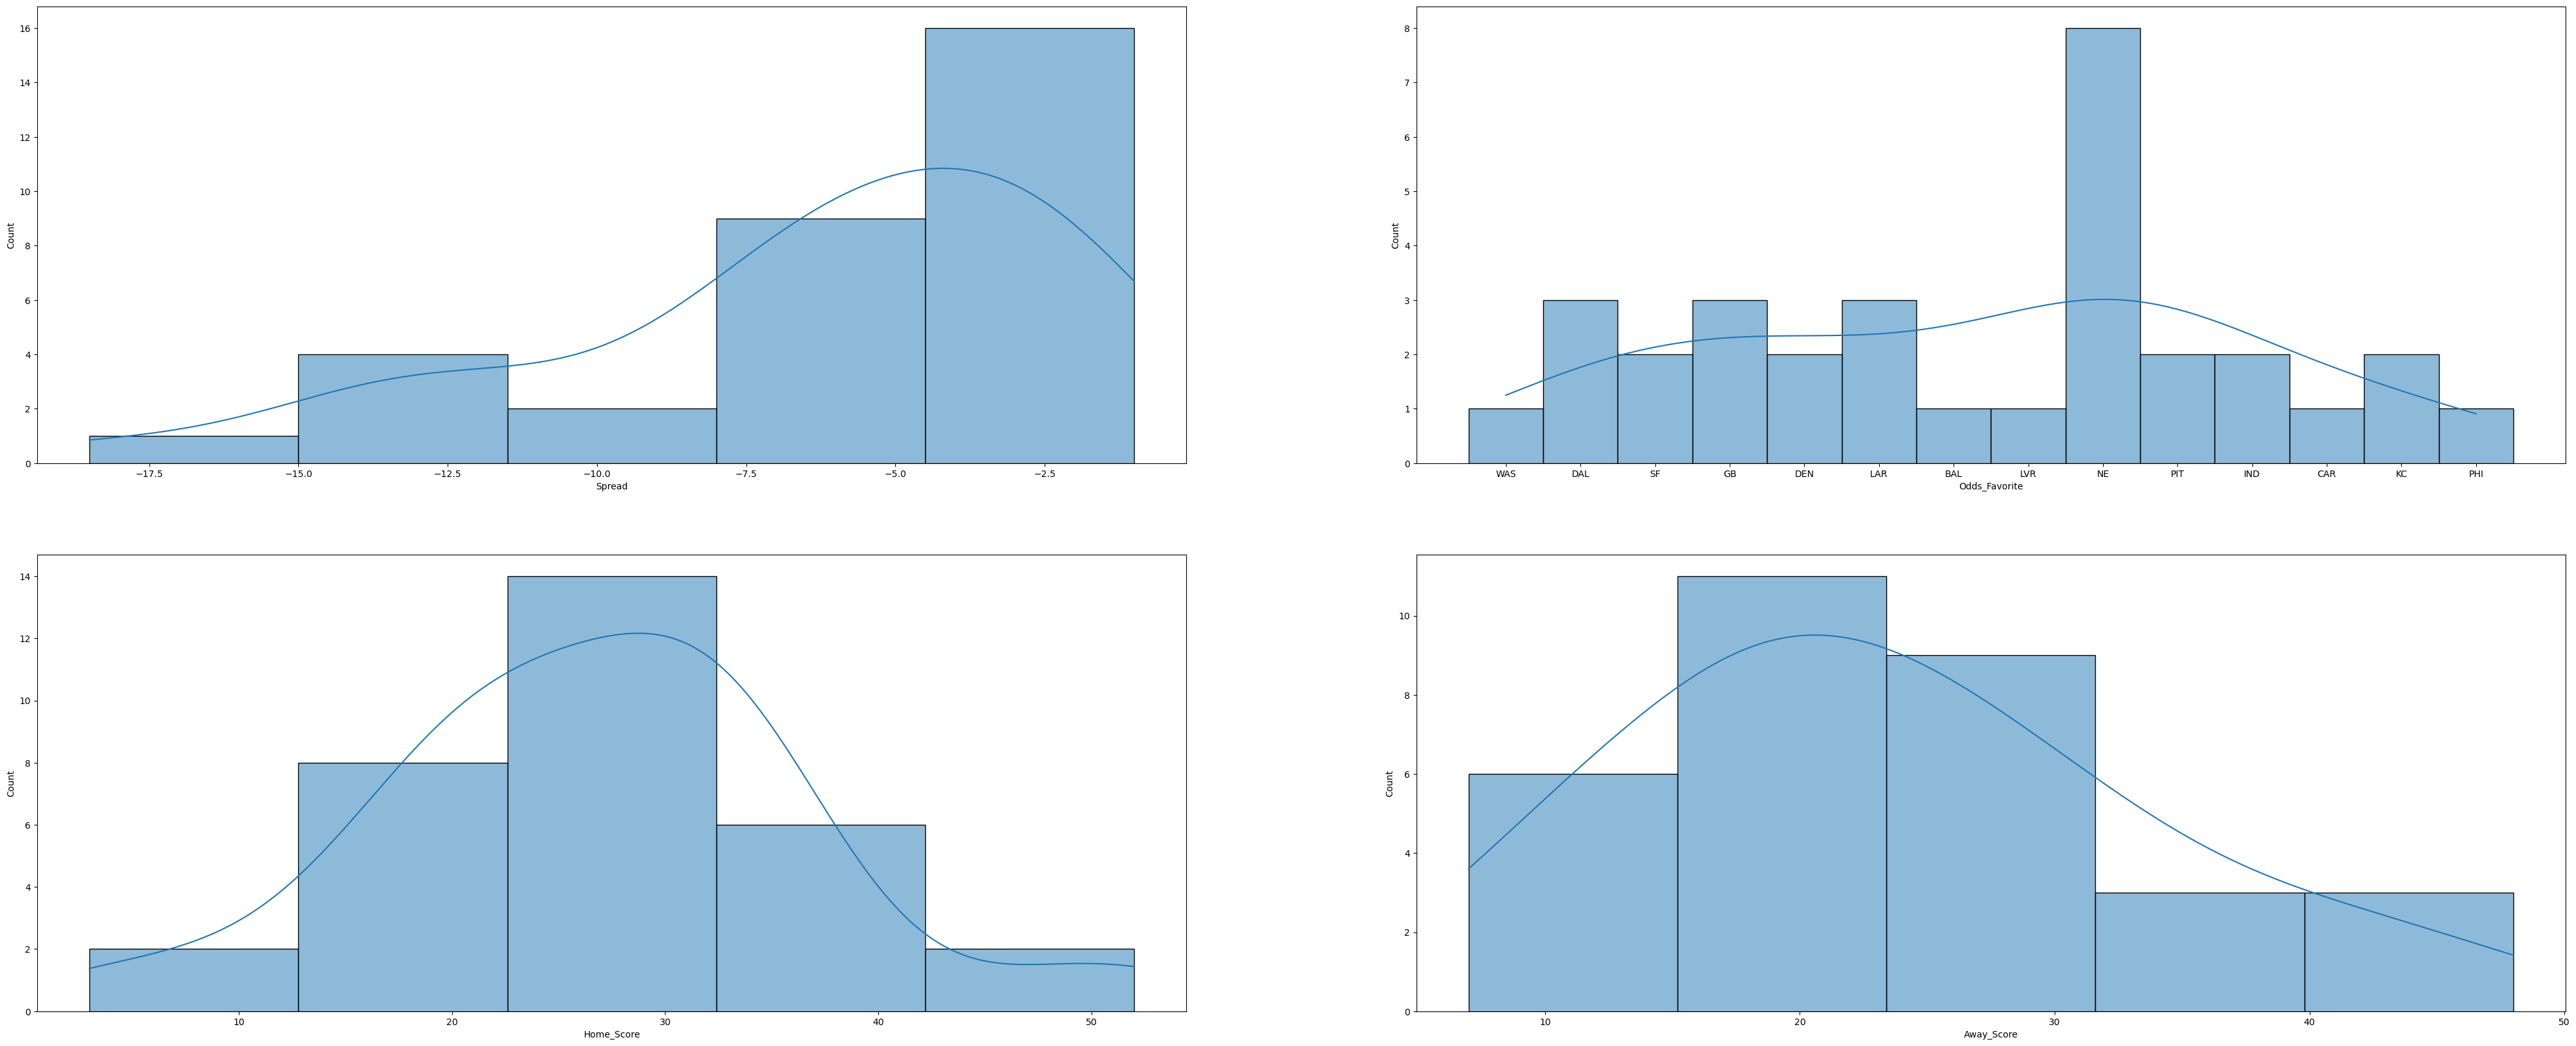

In [8]:

fig, ax = plt.subplots(2,2, figsize=(50, 20))
sns.histplot(data=s, bins=5, kde=True, ax = ax[0,0])
sns.histplot(data=o, bins=5, kde=True, ax = ax[0,1])
sns.histplot(data=h, bins=5, kde=True, ax = ax[1,0])
sns.histplot(data = a, bins=5, kde=True, ax = ax[1,1])


<Axes: >

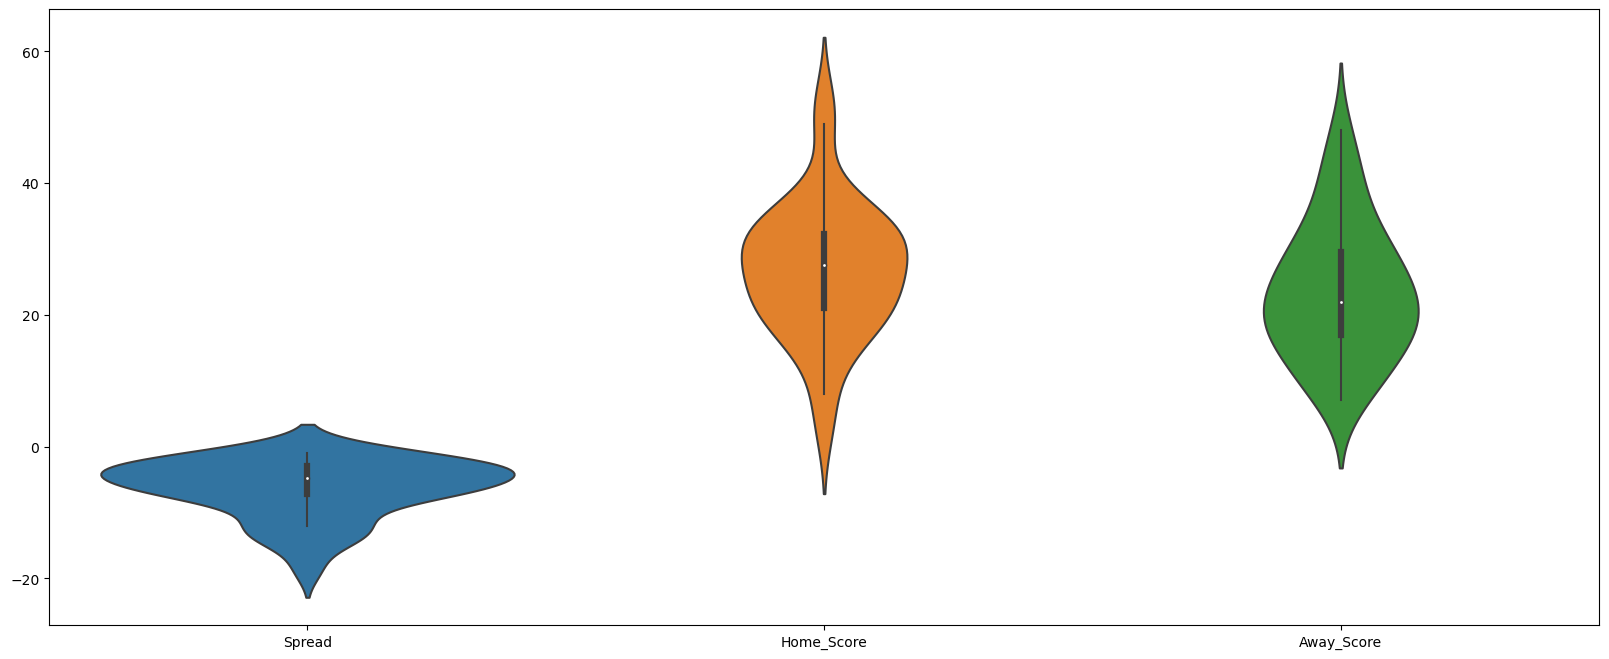

In [90]:

fig, ax = plt.subplots(figsize=(20, 8))
sns.violinplot(list6.loc[:,['Spread','OverUnder', 'Home_Score', 'Away_Score']])